## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

In [2]:
data = pd.DataFrame(pd.read_csv("advertising.csv"))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Understand Data

In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data VIZ

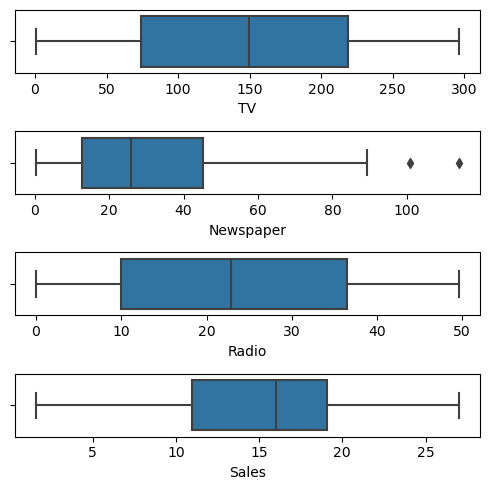

In [6]:
fig, axs = plt.subplots(4, figsize=(5, 5))
plt1 = sns.boxplot(x=data['TV'], ax=axs[0])
plt2 = sns.boxplot(x=data['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(x=data['Radio'], ax=axs[2])
plt4 = sns.boxplot(x=data['Sales'], ax=axs[3])
plt.tight_layout()

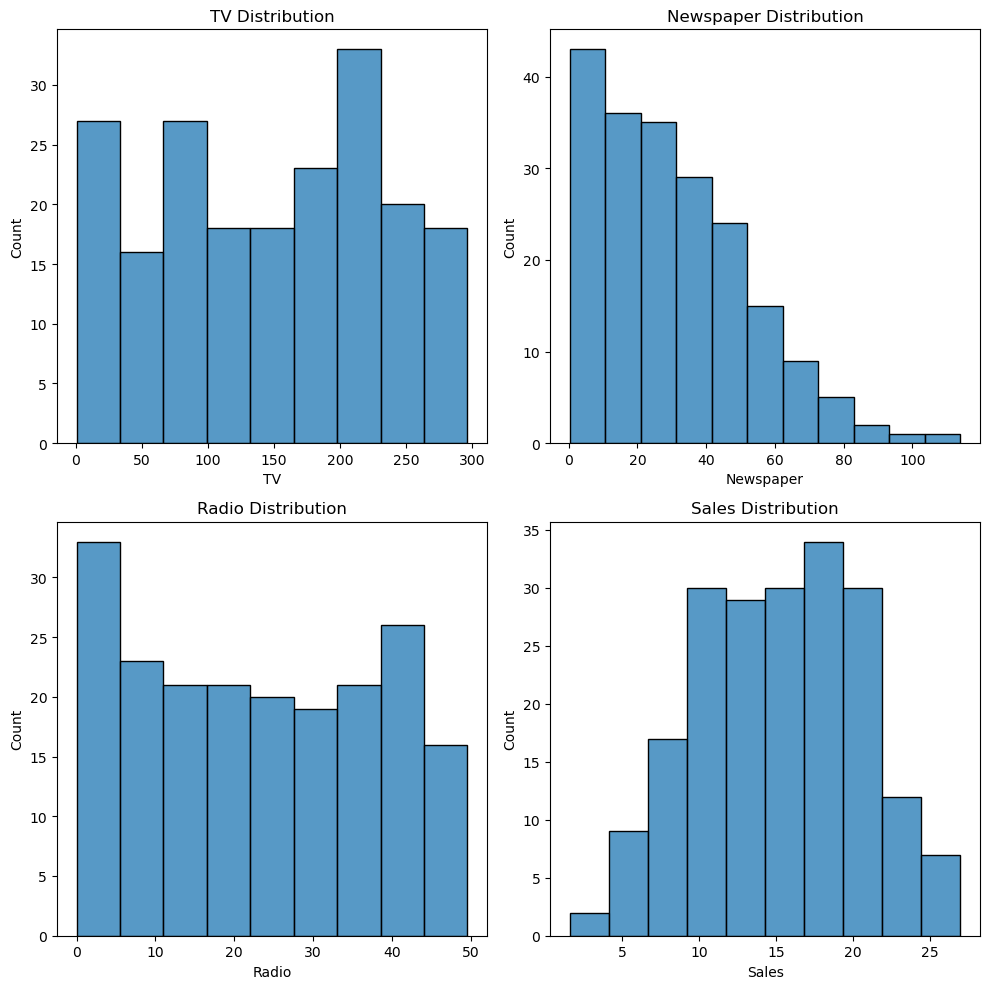

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of subplots

sns.histplot(data['TV'], ax=axs[0, 0])
axs[0, 0].set_title('TV Distribution')

sns.histplot(data['Newspaper'], ax=axs[0, 1])
axs[0, 1].set_title('Newspaper Distribution')

sns.histplot(data['Radio'], ax=axs[1, 0])
axs[1, 0].set_title('Radio Distribution')

sns.histplot(data['Sales'], ax=axs[1, 1])
axs[1, 1].set_title('Sales Distribution')

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()


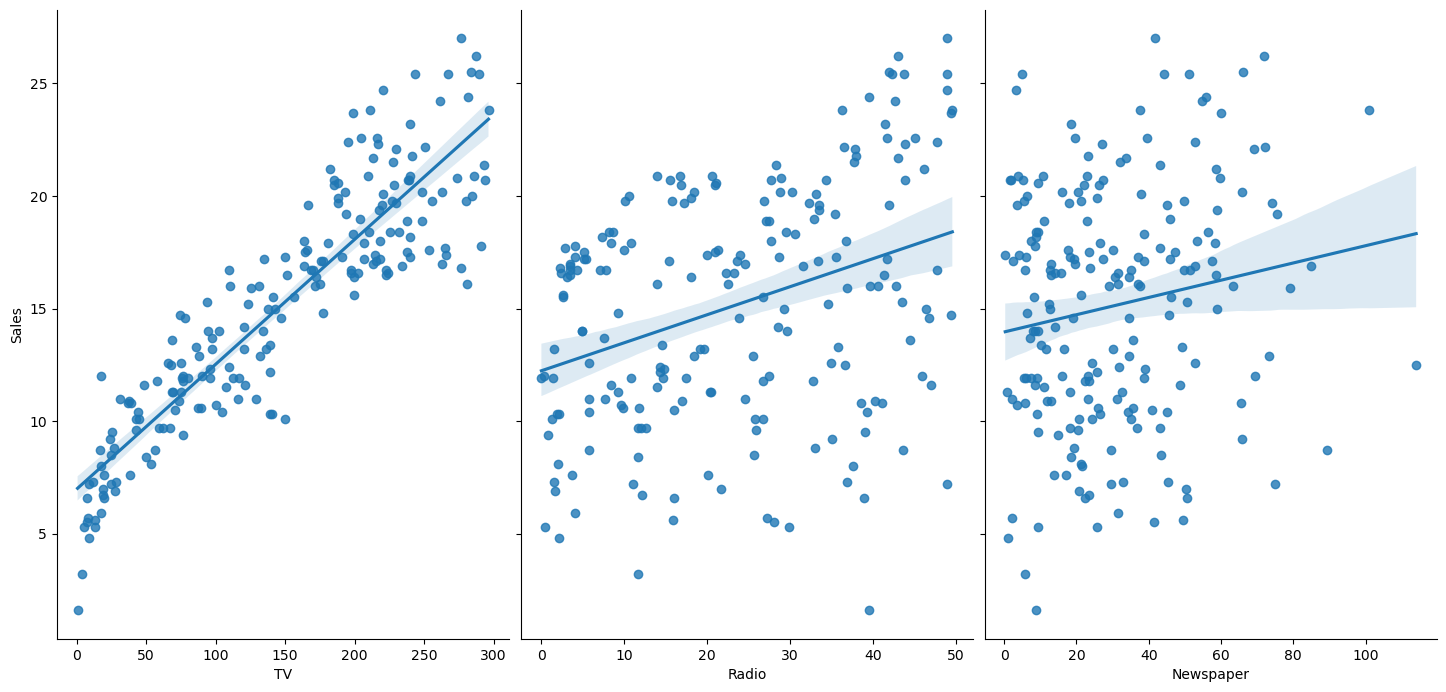

In [8]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, 
            aspect=0.7, kind='reg')

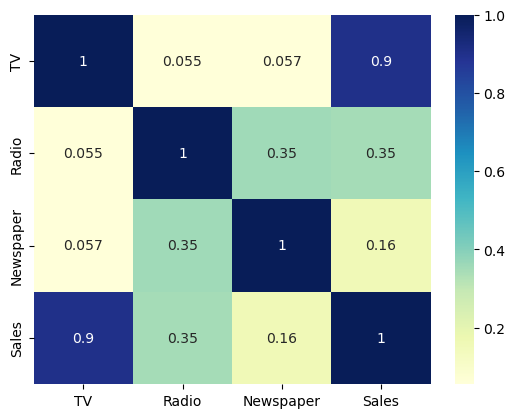

In [9]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

## ML model

In [10]:
x = data.drop(columns='Sales') 
y = data['Sales']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression(fit_intercept = True)

In [13]:
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [15]:
lr.intercept_

4.714126402214134

In [16]:
lr.score(X_train,Y_train)

0.9001416005862131

In [17]:
y_pred = lr.predict(X_test)

In [18]:
res = (Y_test-y_pred)

In [19]:
pred_y_table = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":y_pred,"Difference":res})
pred_y_table.head()

,Actual Value,Predicted Value,Difference
95,16.9,17.034772,-0.134772
15,22.4,20.409740,1.990260
30,21.4,23.723989,-2.323989
158,7.3,9.272785,-1.972785
128,24.7,21.682719,3.017281
